## Following the trend of the Te by LPs on both inner/outer divertors

In [27]:
import matplotlib.pyplot as plt
from scipy.signal import medfilt
import numpy as np
from readStark import *
from ipfnpytools.rhosep2 import rhosep2
from ipfnpytools.getsig import getsig
plt.style.use('helvet2dark')

In [18]:
#shotnr = 34875
shotnr = 30518
te_in = readDivData('./Support_Files/3D_'+str(shotnr)+'_te_in_rho.dat')
te_ou = readDivData('./Support_Files/3D_'+str(shotnr)+'_te_out_rho.dat')

In [11]:
hfsrho = getsig(shotnr, 'RDL', 'HFSRHO')
lfsrho = getsig(shotnr, 'RDL', 'LFSRHO')

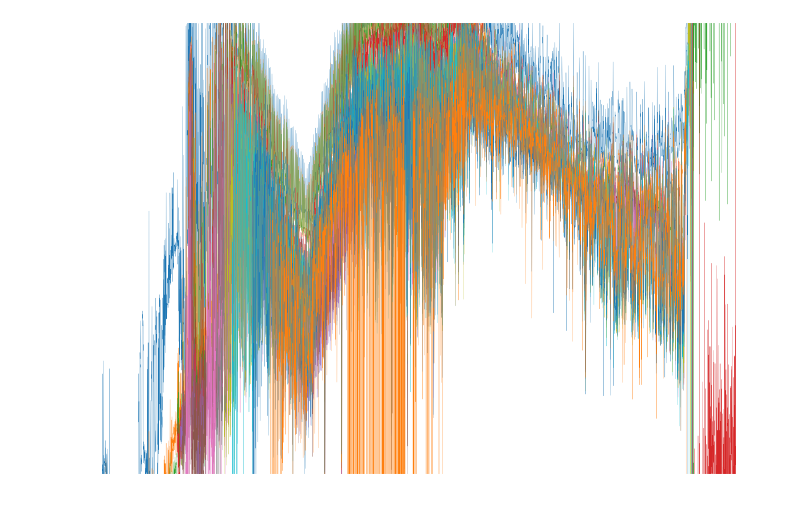

In [12]:
plt.figure(dpi=150)
plt.plot(hfsrho.time, hfsrho.data, lw=0.1)
plt.ylim(0.98, 1.1)
plt.show()

In [33]:
rsep2 = rhosep2(shotnr, te_in.time)

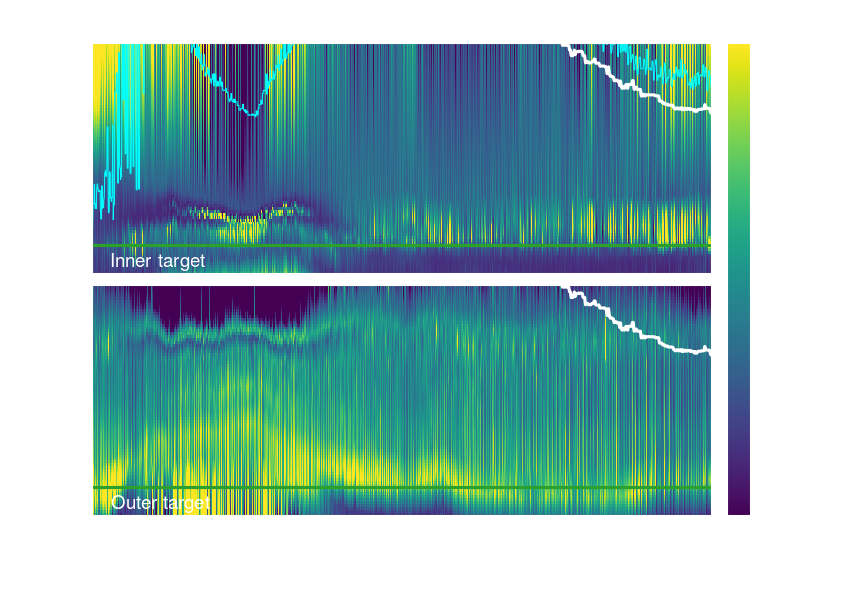

In [36]:
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(6,4), dpi=150)

clrmap = 'viridis'

ax[0].set_title('\#'+str(shotnr), loc='left')
ax[0].pcolormesh(te_in.time, te_in.deltas, te_in.data, shading='goraud', vmin=0.0, vmax=20, cmap=clrmap)
ax[0].axhline(1.0, color='C2')
ax[0].plot(te_in.time, medfilt(rsep2, 11), color=r'white')
ax[0].set_ylim(np.min(te_in.deltas)+0.01,np.max(te_in.deltas))
ax[0].set_ylabel(r'$\mathrm{\rho_{pol}}$')
ax[0].text(0.03, 0.03, 'Inner target', color='white', transform=ax[0].transAxes)

refclr = r'cyan'
ax[0].plot(hfsrho.time, medfilt(hfsrho.data[:,1], 11), color=refclr,lw=0.5)
#ax[0].text(2.4, 1.03, r'$\mathrm{n_e=2.5\,[10^{19}\,m^{-3}]}$', color=refclr)

clm1 = ax[1].pcolormesh(te_ou.time, te_ou.deltas, te_ou.data, shading='goraud', vmin=0.0, vmax=20, cmap=clrmap)
ax[1].axhline(1.0, color='C2')
ax[1].plot(te_in.time, medfilt(rsep2,11), color=r'white')

ax[1].set_ylim(np.min(te_in.deltas),np.max(te_in.deltas))
ax[1].set_ylim(np.min(te_in.deltas)+0.01,np.max(te_in.deltas))
ax[1].set_ylabel(r'$\mathrm{\rho_{pol}}$')
ax[1].text(0.03, 0.03, 'Outer target', color='white', transform=ax[1].transAxes)
ax[1].set_xlabel('time [s]')
ax[1].set_xlim(np.min(te_in.time),np.max(te_in.time))
plt.tight_layout()
plt.subplots_adjust(hspace=0.05, left=0.12, right=0.95)

clb = fig.colorbar(clm1, ax=ax.ravel().tolist(),pad=0.02)
clb.set_label(r'$\mathrm{T_{e}\,[eV]}$',rotation=90)

plt.savefig('./Figures/temp_LP_'+str(shotnr)+'.png', dpi=200, transparent=True)
plt.show()

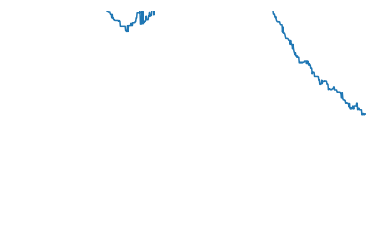

In [37]:
rsep2 = rhosep2(30518, te_in.time)
plt.plot(te_in.time, medfilt(rsep2,11))
plt.xlim(1,4.5)
plt.ylim(1.0,1.1)
plt.show()